#Meteostat

In [1]:
!pip install meteostat -q

<img src= "https://www.meteo60.fr/satellites/animation-satellite-ir-france.gif" width="900">

In [2]:
#https://dev.meteostat.net/api/stations/meta.html#response

In [3]:
 # cities coordintes
 #https://www.latlong.net/category/cities-109-15-2.html

https://www.latlong.net/category/cities-109-15-2.html

In [4]:
#cities = {'city_name':[Latitude,Longitude]}
cities = {'Bologna':[44.498955,11.327591]}
cities.values()

list(cities.values())[0][0] #Latitude

44.498955

In [5]:
list(cities.keys())[0]

'Bologna'

In [6]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2019, 1, 1)
end = datetime(2025, 1, 21) # fa una settimana di forecasting

cities = {'Bologna':[44.498955,11.327591]}


# Create Point for Vancouver, BC
city = Point(list(cities.values())[0][0],list(cities.values())[0][1], 20)

# Get daily data for 2018
data = Daily(city, start, end)
data = data.fetch()
data['city'] = list(cities.keys())[0]

data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city
time,,,,,,,,,,,
2019-01-01,0.6,-2.9,4.1,NaN,NaN,266.0,7.9,NaN,1027.1,NaN,Bologna
2019-01-02,0.2,-2.0,2.1,NaN,NaN,269.0,7.4,NaN,1020.2,NaN,Bologna
2019-01-03,0.8,-2.9,6.1,NaN,NaN,205.0,7.5,NaN,1026.5,NaN,Bologna
2019-01-04,0.3,-4.9,6.1,NaN,NaN,234.0,7.0,NaN,1028.7,NaN,Bologna
2019-01-05,0.2,-2.9,4.4,NaN,NaN,233.0,5.9,NaN,1021.9,NaN,Bologna
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17,3.0,0.1,7.1,0.0,NaN,267.0,7.0,NaN,1035.9,NaN,Bologna
2025-01-18,3.2,-1.9,8.1,2.2,NaN,251.0,8.8,NaN,1029.6,NaN,Bologna
2025-01-19,5.8,4.1,8.1,1.0,NaN,259.0,7.0,NaN,1024.8,NaN,Bologna


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2213 entries, 2019-01-01 to 2025-01-21
Freq: D
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    2213 non-null   float64
 1   tmin    2213 non-null   float64
 2   tmax    2213 non-null   float64
 3   prcp    1468 non-null   float64
 4   snow    0 non-null      float64
 5   wdir    2213 non-null   float64
 6   wspd    2213 non-null   float64
 7   wpgt    0 non-null      float64
 8   pres    2213 non-null   float64
 9   tsun    0 non-null      float64
 10  city    2213 non-null   object 
dtypes: float64(10), object(1)
memory usage: 207.5+ KB


In [8]:
#Iteration Pandas

for city in cities.items():
    print(city)

('Bologna', [44.498955, 11.327591])


In [9]:
for key, value in cities.items():
    print(key, '->', value)
    print(value[0])

Bologna -> [44.498955, 11.327591]
44.498955


## Multiples

In [10]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import pandas as pd

# Set time period
start = datetime(2022, 1, 1)
end = datetime(2025, 1, 21)

cities = {'Bologna':[44.498955,11.327591],
          'Ravenna':[44.418362,12.203529]
          }

###############################################################

data = pd.DataFrame()

for key, value in cities.items():
    print(key, '->', value)
    city = Point(value[0],#lat
             value[1],#long
             20 # m height
             )
    # Get daily data for 2018
    data1 =Daily(city, start, end)
    data1 = data1.fetch()
    data1['city'] = key
    data = pd.concat([data, data1], ignore_index=False)

data.to_csv('test.csv')
print('Done!')
data

Bologna -> [44.498955, 11.327591]
Ravenna -> [44.418362, 12.203529]


Done!


,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city
time,,,,,,,,,,,
2022-01-01,1.7,-0.9,4.3,0.0,NaN,287.0,3.7,NaN,1025.6,NaN,Bologna
2022-01-02,4.2,-1.9,11.1,0.0,NaN,315.0,4.7,NaN,1024.9,NaN,Bologna
2022-01-03,4.2,3.1,5.1,0.0,NaN,84.0,5.1,NaN,1020.4,NaN,Bologna
2022-01-04,4.7,3.1,6.1,0.0,NaN,305.0,4.4,NaN,1012.1,NaN,Bologna
2022-01-05,6.7,4.1,14.7,19.9,NaN,293.0,10.6,NaN,1001.9,NaN,Bologna
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17,4.7,2.3,7.6,0.0,NaN,355.0,7.5,NaN,1035.5,NaN,Ravenna
2025-01-18,4.3,1.7,7.0,1.8,NaN,276.0,9.6,NaN,1029.6,NaN,Ravenna
2025-01-19,6.4,4.7,8.4,3.6,NaN,290.0,6.9,NaN,1025.1,NaN,Ravenna


In [11]:
data.groupby('city').count()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
city,,,,,,,,,,
Bologna,1117,1117,1117,1104,0,1117,1117,0,1117,0
Ravenna,1117,1117,1117,1116,2,1117,1117,0,1117,0


In [12]:
df = data[data['city']=='Bologna']

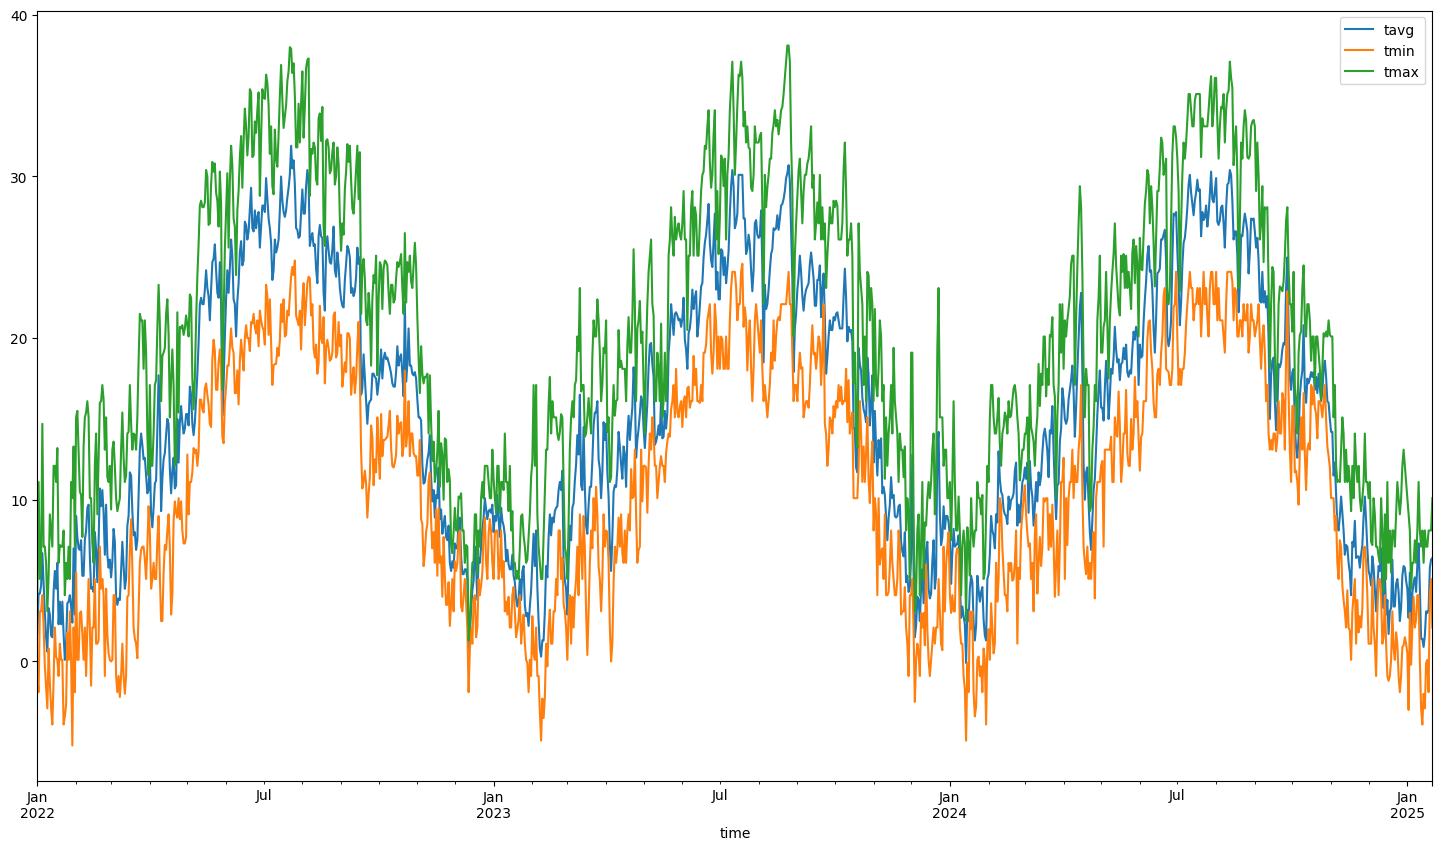

In [13]:
# Plot line chart including average, minimum and maximum temperature
df.plot(y=['tavg', 'tmin', 'tmax'],figsize=(18,10))
plt.show()

In [14]:
df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city
time,,,,,,,,,,,
2022-01-01,1.7,-0.9,4.3,0.0,NaN,287.0,3.7,NaN,1025.6,NaN,Bologna
2022-01-02,4.2,-1.9,11.1,0.0,NaN,315.0,4.7,NaN,1024.9,NaN,Bologna
2022-01-03,4.2,3.1,5.1,0.0,NaN,84.0,5.1,NaN,1020.4,NaN,Bologna
2022-01-04,4.7,3.1,6.1,0.0,NaN,305.0,4.4,NaN,1012.1,NaN,Bologna
2022-01-05,6.7,4.1,14.7,19.9,NaN,293.0,10.6,NaN,1001.9,NaN,Bologna
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17,3.0,0.1,7.1,0.0,NaN,267.0,7.0,NaN,1035.9,NaN,Bologna
2025-01-18,3.2,-1.9,8.1,2.2,NaN,251.0,8.8,NaN,1029.6,NaN,Bologna
2025-01-19,5.8,4.1,8.1,1.0,NaN,259.0,7.0,NaN,1024.8,NaN,Bologna


In [15]:
import plotly.express as px
import pandas as pd

# Create the base figure with the first line
fig = px.line(df,
              x=df.index,
              y='tavg',
              title="Titolo",
              width=1500,
              height=700)

# Add the second line
fig.add_scatter(x=df.index,
                y=df['tmax'],
                name="Predicted",
                line_color='#ff8c00')

# Update the first trace's properties
fig.data[0].update(name="Actual",
                   line_color='#0000FF')

# Update axis labels
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Sales"
)

# Add rangeslider and range selector
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

## Featurizing

In [16]:
# if we have time as a string column -->
# df['Mese'] = pd.to_datetime(df['Data']).dt.month
# df['Anno'] = pd.to_datetime(df['Data']).dt.year


In [17]:
import pandas as pd

url = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/monthly_csv.csv"
df1 = pd.read_csv( url,
                 index_col="Date",
                 parse_dates=['Date'],
                 )
df1

,Source,Mean
Date,,
2016-12-06,GCAG,0.7895
2016-12-06,GISTEMP,0.8100
2016-11-06,GCAG,0.7504
2016-11-06,GISTEMP,0.9300
2016-10-06,GCAG,0.7292
...,...,...
1880-03-06,GISTEMP,-0.1800
1880-02-06,GCAG,-0.1229
1880-02-06,GISTEMP,-0.2100


In [18]:
df1['year'] = pd.DatetimeIndex(df1.index).year
df1['month'] = pd.DatetimeIndex(df1.index).month
df1

,Source,Mean,year,month
Date,,,,
2016-12-06,GCAG,0.7895,2016,12
2016-12-06,GISTEMP,0.8100,2016,12
2016-11-06,GCAG,0.7504,2016,11
2016-11-06,GISTEMP,0.9300,2016,11
2016-10-06,GCAG,0.7292,2016,10
...,...,...,...,...
1880-03-06,GISTEMP,-0.1800,1880,3
1880-02-06,GCAG,-0.1229,1880,2
1880-02-06,GISTEMP,-0.2100,1880,2


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3288 entries, 2016-12-06 to 1880-01-06
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  3288 non-null   object 
 1   Mean    3288 non-null   float64
 2   year    3288 non-null   int32  
 3   month   3288 non-null   int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 102.8+ KB


In [20]:
import altair as alt

alt.Chart(df1).mark_rect().encode(
    x= 'year:O' ,
    y= 'month:O' ,
    color=alt.Color( 'Mean:Q' , scale=alt.Scale( range =['blue','green', 'yellow','orange','red']))
).properties(width= 1600,height=550)

alt.Chart(...)

In [21]:
alt.Chart(df1).mark_boxplot().encode(
    x='month',
    y='Mean'
).properties(width= 1000,height=550)

alt.Chart(...)

In [22]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',]

charts =alt.hconcat(spacing=0)
for i in range(1,13):
    if i == 1:
        axis = alt.Axis(grid=False)
    else:
        axis = None
    chart = alt.Chart(df1).mark_line().encode(
        x=alt.X('year:O', title=months[i-1]),
        y=alt.Y('Mean', axis=axis)
    ).transform_filter(
        alt.FieldEqualPredicate(field='month', equal=i)
    ).properties(
        width=300,
        height=550
    )
    charts |= chart

charts

alt.HConcatChart(...)